In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from plotly.offline import plot

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from utils import save_plotly_figure_as_html
from ex_01_read_data import get_welding_data



In [2]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_02")

## Exercise 2.1: Dataset Statistics Analysis

In this exercise, we'll calculate and present comprehensive descriptive statistics for the welding dataset. This statistical overview will help us understand the fundamental characteristics of our data before visualization or modeling.

1. Calculate the class distribution to understand data balance
2. Count samples per experiment to assess data volume across experimental conditions
3. Determine min/max values for voltage and current to understand the range of measurements
4. Calculate mean and standard deviation to assess central tendency and variability
5. Find median values to identify central points unaffected by outliers

In [3]:
data, labels, exp_ids = get_welding_data(data_path)

In [4]:
# Class Distribution
class_counts = pd.Series(labels).value_counts().sort_index()
print("Class distribution:\n", class_counts)

# Count samples Experiment
experiment_counts = pd.Series(exp_ids).value_counts().sort_index()
print("\nSamples per experiment:\n", experiment_counts)

# Determine min max vlaues
voltage_cols = np.arange(0, data.shape[1], 2)
current_cols = np.arange(1, data.shape[1], 2)

voltages = data[:, voltage_cols]
currents = data[:, current_cols]

# Statistiken
print("\nVoltage statistics:")
print(f"Min: {voltages.min():.2f}, Max: {voltages.max():.2f}")
print(f"Mean: {voltages.mean():.2f}, Std: {voltages.std():.2f}, Median: {np.median(voltages):.2f}")

print("\nCurrent statistics:")
print(f"Min: {currents.min():.2f}, Max: {currents.max():.2f}")
print(f"Mean: {currents.mean():.2f}, Std: {currents.std():.2f}, Median: {np.median(currents):.2f}")



Class distribution:
 0    90746
1    67219
Name: count, dtype: int64

Samples per experiment:
 1    35521
2    17913
3    46768
4    57763
Name: count, dtype: int64

Voltage statistics:
Min: -1.17, Max: 614.15
Mean: 97.75, Std: 148.67, Median: 30.08

Current statistics:
Min: -1.18, Max: 613.79
Mean: 97.74, Std: 148.67, Median: 30.08


## Exercise 2.2: Current and Voltage Distribution Visualization

In this exercise, we'll create interactive boxplots to visualize and compare the distributions of voltage and current measurements in the welding data. Boxplots will help us identify central tendencies, spread, and potential outliers in our measurements.

1. Create side-by-side boxplots for voltage and current using Plotly
2. Display key statistics (median, quartiles, etc.) in a visual format in the plot
3. Enable interactive exploration of the distributions
4. Save the visualization for future reference

In [5]:
data, labels, exp_ids = get_welding_data(data_path, n_samples=10)

save_path =  plot_path / "voltage_current_distribution"

In [6]:
# Select voltage and current columns
voltage_cols = np.arange(0, data.shape[1], 2)
current_cols = np.arange(1, data.shape[1], 2)

voltages = data[:, voltage_cols].flatten()
currents = data[:, current_cols].flatten()

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    "Voltage": voltages,
    "Current": currents
})

# Melt the DataFrame to long format for Plotly
df_melted = df_plot.melt(var_name='Measurement Type', value_name='Value')

# Create boxplot
fig = px.box(df_melted, x='Measurement Type', y='Value', points='all', title="Voltage and Current Distributions")

# Show interactive plot
plot(fig)

# Save to HTML
save_plotly_figure_as_html(fig, save_path)


## Exercise 2.3: Time-Series Sequence Visualization

In this exercise, we'll implement functions to visualize the time-series patterns of welding cycles. These visualizations will help us understand the temporal relationships between voltage and current during the welding process and identify patterns associated with quality outcomes.

1. Create dual-axis plots showing voltage and current over time (10 welding cycles -> sequence_length=10) using matplotlib
2. Implement clear legends and labels for data interpretation
3. Enable saving of visualizations for reporting and comparison

In [7]:

data, labels, exp_ids = get_welding_data(data_path, n_samples=100, return_sequences=True, sequence_length=10)
save_path = plot_path / "welding_sample.png"    

Plot saved to plots/ex_02/welding_sample.png


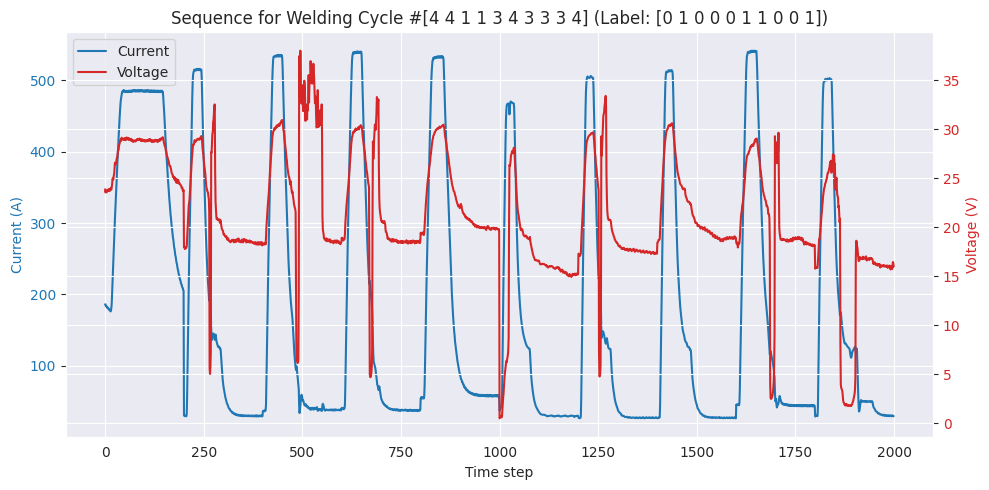

In [8]:
index = 0

if index >= len(data):
    raise IndexError(f"Index {index} is out of range for data with shape {data.shape}")

sequence = data[index]
time = np.arange(sequence.shape[0])
current = sequence[:, 0]
voltage = sequence[:, 1]

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot current
ax1.set_xlabel("Time step")
ax1.set_ylabel("Current (A)", color='tab:blue')
ax1.plot(time, current, label="Current", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot voltage on second axis
ax2 = ax1.twinx()
ax2.set_ylabel("Voltage (V)", color='tab:red')
ax2.plot(time, voltage, label="Voltage", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legend
plt.title(f"Sequence for Welding Cycle #{exp_ids[index]} (Label: {labels[index]})")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

fig.tight_layout()

if save_path:
    save_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved to {save_path}")
else:
    plt.show()

    plt.close()

## Exercise 2.4: Interactive Time-Series Visualization with Plotly

In this exercise, we'll create enhanced interactive visualizations of welding samples using Plotly. These interactive plots will provide more advanced exploration capabilities for analyzing the time-series patterns.

1. Create interactive plots with dual y-axes for voltage and current
2. Implement time-based range sliders for detailed exploration
3. Add unified tooltips for precise data reading
4. Display quality metrics in the plot title
5. Save interactive visualizations as HTML for sharing

In [9]:
import numpy as np
import plotly.graph_objects as go
import random

def create_plotly_plot(data: np.ndarray, labels: np.ndarray, exp_ids: np.ndarray = None) -> go.Figure:
    idx = random.randint(0, data.shape[0] - 1)
    sample = data[idx]
    voltage = sample[:, 0]
    current = sample[:, 1]
    time = np.arange(len(voltage))  # Annahme: gleichmäßig verteilte Zeit

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=time, y=voltage, mode='lines', name='Voltage'))
    fig.add_trace(go.Scatter(x=time, y=current, mode='lines', name='Current'))

    title = f"Sample #{idx}"
    if exp_ids is not None:
        title += f" | Experiment ID: {exp_ids[idx]}"
    if labels is not None:
        title += f" | Label: {labels[idx]}"

    fig.update_layout(
        title=title,
        xaxis_title='Time Step',
        yaxis_title='Value',
        legend=dict(x=0, y=1),
        template='plotly_dark'
    )

    return fig


In [10]:
# Beispiel: Funktion testen
data, labels, exp_ids = get_welding_data(data_path, n_samples=100)

# Erzeuge zufällige interaktive Visualisierung
fig = create_plotly_plot(data, labels, exp_ids)

# Speichern und anzeigen
save_plotly_figure_as_html(fig, plot_path / "welding_sample_random.html")
fig.show()


## Exercise 2.5: Multiple Sample Comparison

In this exercise, we'll generate and compare visualizations from multiple random welding samples. This comparison will help us identify common patterns and variations across different welding cycles.
 

1. Generate multiple random sample visualizations using matplotlib of single welding cycles
2. Create dual-axis plots showing voltage and current over time
3. Implement clear legends and labels for data interpretation
4. Save each visualization for comparison

In [11]:
data, labels, exp_ids = get_welding_data(data_path, n_samples=1_000)

In [12]:
for i in range(5):
    plot_random_sample(data, labels, save_path=plot_path / f"welding_sample_{i}.png")
    

NameError: name 'plot_random_sample' is not defined

In [35]:
def plot_random_sample(data: np.ndarray, labels: np.ndarray, save_path: Path = None) -> None:
    """
    Plots a random welding sample (voltage and current) and saves it as a PNG file.

    Args:
        data (np.ndarray): Welding data array (shape: [n_samples, n_timesteps, 2])
        labels (np.ndarray): Array of class labels
        save_path (Path, optional): Path to save the figure. If None, the plot is shown instead.
    """
    # Zufällige Probe wählen
    idx = random.randint(0, data.shape[0] - 1)
    sample = data[idx]
    voltage = sample[:, 0]
    current = sample[:, 1]
    time = np.arange(len(voltage))

    # Plot erstellen
    plt.figure(figsize=(10, 5))
    plt.plot(time, voltage, label="Voltage", color="tab:blue")
    plt.plot(time, current, label="Current", color="tab:orange")
    plt.title(f"Random Welding Sample #{idx} | Label: {labels[idx]}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()

    # Speichern oder anzeigen
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()
